In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student-por.csv', delimiter= ';')
print(data.shape)

(649, 33)


In [3]:
data1 = pd.read_csv('student-mat.csv', delimiter= ';')
data1.head()
print(data1.shape)

(395, 33)


In [4]:
data = pd.concat([data,data1], axis=0)

In [5]:
print(data.shape)

(1044, 33)


In [6]:
X= data.iloc[:,:-1].values
Y = data.iloc[:,32].values

In [7]:
np.median(Y)

11.0

In [8]:
Y = (Y>11)

In [9]:
X = pd.DataFrame(data=X)
Y = pd.DataFrame(data=Y)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13


In [11]:
X[2] = pd.to_numeric(X[2]) 
X[6] = pd.to_numeric(X[6])
X[7] = pd.to_numeric(X[7])
X[12] = pd.to_numeric(X[12])
X[13] = pd.to_numeric(X[13])
X[14] = pd.to_numeric(X[14])
X[25] = pd.to_numeric(X[25])
X[26] = pd.to_numeric(X[26])
X[27] = pd.to_numeric(X[27])
X[28] = pd.to_numeric(X[28])
X[23] = pd.to_numeric(X[23])
X[24] = pd.to_numeric(X[24])
X[29] = pd.to_numeric(X[29])
X[30] = pd.to_numeric(X[30])
X[31] = pd.to_numeric(X[31])

In [12]:
CGData = X.select_dtypes(exclude = ['int64','float64'])
CGData.head()

,0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


In [13]:
Numerical = X.drop(CGData, axis=1)
print(Numerical.shape)

(1044, 15)


In [14]:
print(CGData.shape)

(1044, 17)


In [15]:
Dummies = pd.get_dummies(CGData)
Dummies.head()

,0_GP,0_MS,1_F,1_M,3_R,3_U,4_GT3,4_LE3,5_A,5_T,...,18_no,18_yes,19_no,19_yes,20_no,20_yes,21_no,21_yes,22_no,22_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0


In [16]:
X = pd.concat([Dummies,Numerical], axis=1)
print(X.shape)

(1044, 58)


In [17]:
Y.head()

,0
0,False
1,False
2,True
3,True
4,True


In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

C:\Users\Veda Samhitha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

C:\Users\Veda Samhitha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

# FOR TRAINING DATA

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
y_pred_train = classifier.predict(X_train)


In [21]:
print (metrics.accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_train, y_pred_train)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(classification_report(y_train,y_pred_train))
print(matthews_corrcoef(y_train,y_pred_train))
print(cm)
classifier.score(X_train, y_train)

0.8047904191616766
             precision    recall  f1-score   support

      False       0.91      0.69      0.78       425
       True       0.74      0.93      0.82       410

avg / total       0.83      0.80      0.80       835

0.6305056519587069
[[292 133]
 [ 30 380]]


0.8047904191616766

# FOR TEST DATA

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
print (metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(classification_report(y_test,y_pred))
print(matthews_corrcoef(y_test,y_pred))
print(cm)
classifier.score(X_test, y_test)

0.8133971291866029
             precision    recall  f1-score   support

      False       0.88      0.74      0.81       109
       True       0.76      0.89      0.82       100

avg / total       0.82      0.81      0.81       209

0.6371063502929476
[[81 28]
 [11 89]]


0.8133971291866029

# FOR CROSS VALIDATION

In [24]:
from sklearn.model_selection import KFold
from sklearn import metrics

actuals=[]
probs=[]
hats=[]
x = np.array(X)
y= np.array(Y)
kfold = KFold(n_splits=5, shuffle=True, random_state = 42)
for train_index, test_index in kfold.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    foldhats = classifier.predict(X_test)
    foldprobs = classifier.predict_proba(X_test)[:,1] # Class probability estimates for ROC curve
    actuals = np.append(actuals, y_test) #Combine targets, then probs, and then predictions from each fold
    probs = np.append(probs, foldprobs)
    hats = np.append(hats, foldhats)

print (metrics.accuracy_score(actuals, hats))
print (classification_report(actuals, hats))
cm = confusion_matrix(actuals,hats)
print (cm)

0.8122605363984674
             precision    recall  f1-score   support

        0.0       0.87      0.75      0.80       534
        1.0       0.77      0.88      0.82       510

avg / total       0.82      0.81      0.81      1044

[[399 135]
 [ 61 449]]


C:\Users\Veda Samhitha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under the ROC curve : 0.901810


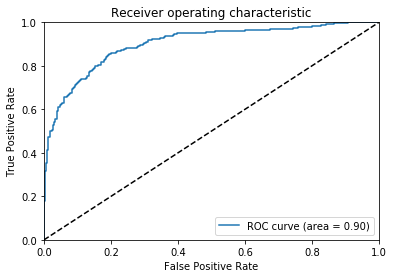

In [25]:
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(actuals, probs)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
ROC(y_test,foldprobs)